In [4]:
# introdução ao capítulo da biblioteca de scikit-learn (machine learning)

In [5]:
# imports desse CodeGUIDE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
# carregamento do dataset:
df_dsa = pd.read_csv("C:\LUCCA\Codigos VSCode\Vscode\DSA ARCHIVES\Cap15 Machine learning com scikit-learn\dataset.csv")

In [7]:
# primeira visualização do dataset:
df_dsa.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [8]:
# resumo das informações do dataset:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [9]:
# Definição do Problema de negócio:

# Usando dados históricos é possível prever o salário de alguém 
# com base no tempo dedicado aos estudos em horas por mês?

# treinar bot de previsão de salario com base em tempo de estudo (h)

In [10]:
# correlação:
df_dsa.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [11]:
# resumo estatístico do dataset:
df_dsa.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

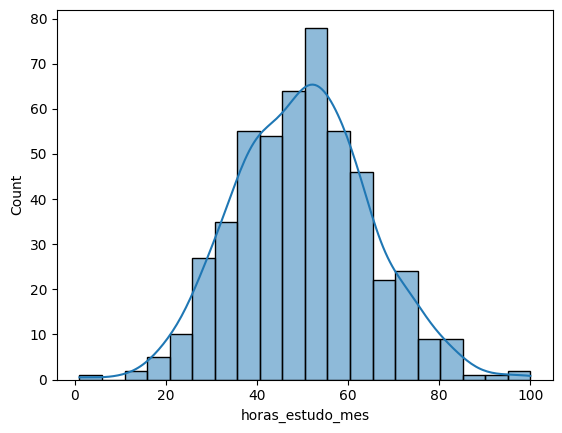

In [12]:
# histograma da variavel preditora
sns.histplot(data = df_dsa, x='horas_estudo_mes', kde=True)

In [13]:
# separação dos dados:
X = np.array(df_dsa["horas_estudo_mes"])

In [14]:
# ajustando shape de X
X = X.reshape(-1,1)

In [15]:
# preparando variável alvo:
y = df_dsa['salario']

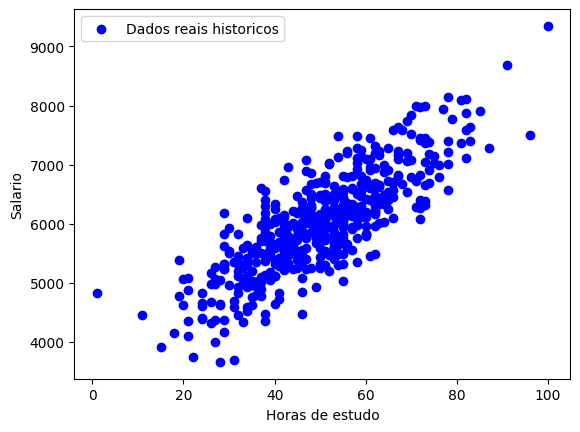

In [16]:
plt.scatter(X,y, color='blue', label="Dados reais historicos")
plt.xlabel("Horas de estudo")
plt.ylabel("Salario")
plt.legend()
plt.show()

In [17]:
# dvidir dados em treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [18]:
X_treino.shape

(400, 1)

In [19]:
X_teste.shape

(100, 1)

In [20]:
y_treino.shape

(400,)

In [21]:
y_teste.shape

(100,)

In [22]:
# criação do modelo de regressão linear simples
modelo = LinearRegression()

In [23]:
modelo.fit(X_treino, y_treino)

LinearRegression()

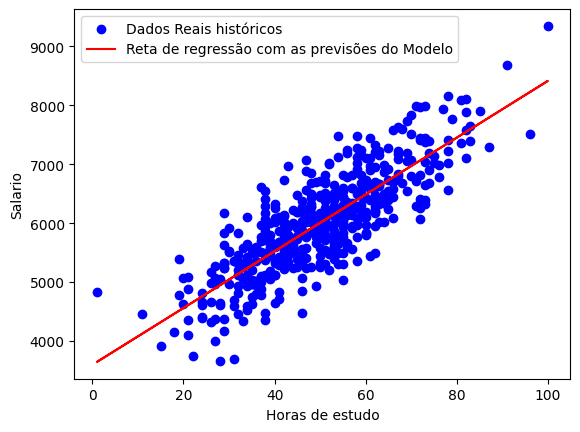

In [24]:
plt.scatter(X,y,color='blue', label="Dados Reais históricos")
plt.plot(X, modelo.predict(X), color='red', label="Reta de regressão com as previsões do Modelo")
plt.xlabel("Horas de estudo")
plt.ylabel("Salario")
plt.legend()
plt.show()

In [25]:
# avaliação do modelo nos dados de teste
score = modelo.score(X_teste, y_teste)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.59


In [26]:
# intercepto - parâmetro w0
modelo.intercept_

3596.783724372753

In [27]:
# Slope - parâmetro w1
modelo.coef_

array([48.18185277])

In [28]:
# Definir um valor para horas de estudo
horas_estudo_novo = np.array([[48]])

# prvisão com modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de {horas_estudo_novo} horas por mês, seu sslário pode ser igual a {salario_previsto}")

Se você estudar cerca de [[48]] horas por mês, seu sslário pode ser igual a [5909.5126574]


In [29]:
# Mesmo resultado anterior usando os parâmetros (coeficientes) aprendidos pelo modelo
# y_novo = w0 + w1 * X
salario = modelo.intercept_ + (modelo.coef_ * horas_estudo_novo)
print(salario)

[[5909.5126574]]


In [30]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[65]]) 

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[65]] horas por mês seu salário pode ser igual a [6728.60415452]


In [31]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[73]]) 

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[73]] horas por mês seu salário pode ser igual a [7114.05897669]
